In [3]:
import numpy as np

# la neurona

![](https://c.tenor.com/K9q23o-X8HEAAAAC/brain-neurons.gif)

# "la neurona"

![](https://i.stack.imgur.com/Ql0YP.png)

In [90]:
# definimos la neurona, recibe de input un vector (x1,x2,...,xn)
# usa los pesos W (w1,w2,...,wn)

def f(x, w):
    
    # suma pesada
    # sumo cada par xn*wn y al final el bias 
    # eso es el producto interno o dot product en algebra
    wsum = np.dot(x,w[1:]) + w[0]
    
    # activacion, si la suma pesada supera cierto limite la funcion
    # tira un 1
    # si no, tira un 0
    
    if wsum >= 0.0:
        output=1
    else:
        output=0
    return output



In [41]:
import pandas as pd

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

data=pd.DataFrame(dataset,columns=['x1','x2','y'])
data

x1        x2  y
0  2.781084  2.550537  0
1  1.465489  2.362125  0
2  3.396562  4.400294  0
3  1.388070  1.850220  0
4  3.064072  3.005306  0
5  7.627531  2.759262  1
6  5.332441  2.088627  1
7  6.922597  1.771064  1
8  8.675419 -0.242069  1
9  7.673756  3.508563  1

In [115]:
X=data[['x1','x2']]
y=data.y

In [122]:
# veamos como funciona si los pesos ya nos vienen definidos
# un peso por cada xn y un bias (3) 

weights = np.array([-0.1, 0.20653640140000007, -0.23418117710000003])

# miro el output de mi neurona para cada fila
# comparo con la columna 'y' el target

for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1


In [131]:
# veamos como funciona si los pesos ya nos vienen definidos
# un peso por cada xn y un bias (3) 

weights = np.array([5, -91, 91])

# miro el output de mi neurona para cada fila
# comparo con la columna 'y' el target

for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=1
Target=0, Prediccion=1
Target=0, Prediccion=1
Target=0, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0


In [113]:
# Pero como obtengo los parametros/pesos y biases? 
# Como obtenia los betas/parametros de cualquier modelo?


# descenso gradiente!

def train_weights(x_train,y_train, l_rate, n_epoch):
    #inicio con w = 0,0...0
    weights = [0.0 for i in range(len(x_train[0])+1)]
    
    print('>epoch=-1, lrate=%.3f, error=inf,w0=%.3f, w1=%.3f, w2=%.3f' %(l_rate,weights[0], weights[1], weights[2])) 
    
    
    
    #itero
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        
        #predigo sobre las filas
        for i,x in enumerate(x_train):
            prediction = f(x, weights)
            
            # calculo la funcion de costo
            error = y_train[i] - prediction
            sum_error += error**2
            
            # defino los nuevos pesos en la direccion del gradiente
            # l_rate era la longuitud del paso en esa direccion
            
            weights[0] = weights[0] + l_rate * error
            for i in range(len(x)):
                weights[i + 1] = weights[i + 1] + l_rate * error * x[i]
                
        print('>epoch=%d, lrate=%.3f, error=%.3f, w0=%.3f, w1=%.3f, w2=%.3f' %
              (epoch, l_rate, sum_error, weights[0], weights[1], weights[2]))
    return weights

In [117]:
# ahora si, entrenemos nuestra neurona

l_rate = 0.1
n_epoch = 5

weights = train_weights(X.values,y, l_rate, n_epoch)


>epoch=-1, lrate=0.100, error=inf,w0=0.000, w1=0.000, w2=0.000
>epoch=0, lrate=0.100, error=2.000, w0=0.000, w1=0.485, w2=0.021
>epoch=1, lrate=0.100, error=1.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=2, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=3, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=4, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234


In [123]:
for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1


In [120]:
weights

[-0.1, 0.20653640140000007, -0.23418117710000003]

In [121]:
f(x, weights)

1

# No es una regresion logistica con sombrero nuevo?


# "la neurona"

![](https://i.stack.imgur.com/Ql0YP.png)

# Funciones de activacion

![](https://www.researchgate.net/publication/323617663/figure/fig3/AS:667846732423172@1536238477220/Nonlinear-function-a-Sigmoid-function-b-Tanh-function-c-ReLU-function-d-Leaky.png)

# Nonlinear functions

* (a) Sigmoid function
* (b) Tanh function
* (c) ReLU function
* (d) Leaky ReLU function.

> Se puede demostrar que sin estas funciones, cualquier red neuronal por mas compleja que sea se puede reducir a una red de una sola capa con coeficientes lineales. Volviendo a la vieja regresion logistica.

# Redes? Capas? 

* En teoria una red neuronal de una sola capa con muchas neuronas, podria aproximar cualquier funcion, pero es mas eficiente entrenar una red de varias capaz de tamaño reducido.

* Como controlamos la complejidad (capacidad de aprendizaje) de una red?

    * Numero de Neuronas (width).
    * Numero de Layers (depth).

![](2.png)



```python
...Theoretical results strongly suggest that in order to learn the kind of complicated functions that can represent high-level abstractions (e.g. in vision, language, and other AI-level tasks), one needs deep architectures. Deep architectures are composed of multiple levels of non-linear operations, such as in neural nets
with many hidden layers...
``` 
                                        - Yoshua Bengio (2009), "Learning Deep Architectures for AI"

* Deeper redes permiten usar menos parametros, las shallow redes no son buenas para abstraer conocimiento (reducir la dimensionalidad) https://arxiv.org/pdf/1312.6098.pdf

![](2.png)


* Relational and semantic knowledge can be obtained at higher levels of abstraction and representation of the raw data (Yoshua Bengio and Yann LeCun, Scaling Learning Algorithms towards AI, 2007).

* Deep architectures can be representationally efficient. This sounds contradictory, but its a great benefit because of the distributed representation power by deep learning.

* The learning capacity of deep learning algorithms is proportional to the size of data, that is, performance increases as the input data increases, whereas, for shallow or traditional learning algorithms, the performance reaches a plateau after a certain amount of data is provided as shown in the following figure, Learning capability of deep learning versus traditional machine learning:


![](https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub.)

## Cuando usar deep learning? tiramos todo lo que aprendimos en el curso?

Miremos la performance de una NN en uno de los dataset que usamos en el curso, como el de 'hitter.csv' si, ese, malisimo! Ya se, pero bueno es uno de los que mas usamos (263 jugadores, 19 variables)

Ajustamos esos datos con una regresion lineal, lasso y una NN. Aca los resultados:

![](0.png)

No solo no performo mejor que una regresion comun, si no que ademas tiene 1.4k parametros!



![](3.png)

![](4.png)

![](5.png)

# Redes Multicapa


In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# activaciones
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(x, 0)
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2
def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2
def relu_prime(x):
    return np.array(x >= 0).astype('int')

# errores
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))
def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size
def sse_prime(y_true, y_pred):
    return y_pred - y_true


ModuleNotFoundError: No module named 'tensorflow'

# Estructura de la Red

```
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 20),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]
```

Todas las capas tienen un metodo forward y backward


In [3]:
# reshapea el input
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)
    
# capa fully conected

class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error 
    
# activacion (no linealidad)

class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)
    
# reshapea el output, normaliza sobre la cantidad de clases
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [4]:
# importamos los datos

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [28]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 10),
    SoftmaxLayer(10)
]

In [13]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 10),
    ActivationLayer(relu, relu_prime),
    SoftmaxLayer(10)
]

In [17]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 20),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]

In [11]:
def train(network,x_train, y_train, epochs=40,learning_rate=0.1):
    err=[]
    # training
    for epoch in range(epochs):
        error = 0
        for x, y_true in zip(x_train, y_train):
            # forward
            output = x
            for layer in network:
                output = layer.forward(output)

            # error (display purpose only)
            error += mse(y_true, output)

            # backward
            output_error = mse_prime(y_true, output)
            for layer in reversed(network):
                output_error = layer.backward(output_error, learning_rate)

        error /= len(x_train)
        err.append(error)
    return(network,err)

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [29]:
network,err=train(network,x_train,y_train)

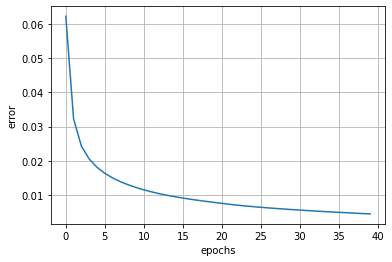

In [30]:
plt.plot(err)
plt.grid(True)
plt.ylabel('error')
plt.xlabel('epochs')
plt.show()

In [31]:
# veamos la performance en el set de testeo

accuracy = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('accuracy: %.4f' % ratio)
print('mse: %.4f' % error)

accuracy: 0.8650
mse: 0.0208


In [2]:

fig, axs = plt.subplots(3,4,figsize=(13,10))


for i,ax in enumerate(axs.flat):
    
    image = np.reshape(test, (28, 28))
    ax.imshow(image, cmap='binary')

    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    ax.text(0.5,2.5,'pred: %s, prob: %.3f, true: %d' % (idx, pred[idx], idx_true))
plt.show()

NameError: name 'plt' is not defined

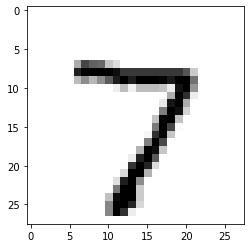

pred: 7, prob: 0.995, true: 7


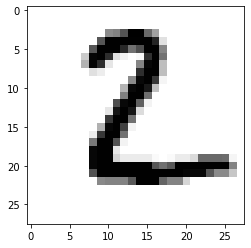

pred: 6, prob: 0.829, true: 2


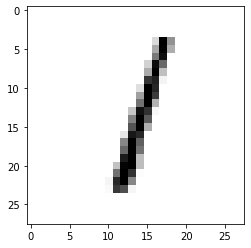

pred: 1, prob: 0.961, true: 1


pred: 0, prob: 0.973, true: 0


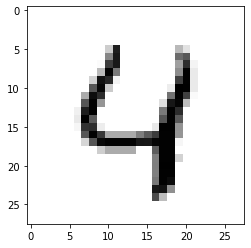

pred: 4, prob: 0.891, true: 4


pred: 1, prob: 0.921, true: 1


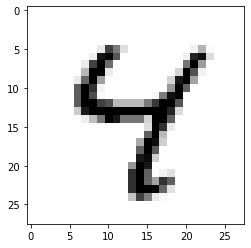

pred: 4, prob: 0.911, true: 4


pred: 9, prob: 0.925, true: 9


In [32]:
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.3f, true: %d' % (idx, pred[idx], idx_true))